## Please do a pip install graphviz in your python terminal environment.

In [9]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [10]:
data = pd.read_csv("zoo.csv")
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
#data_rand = shuffle(data)
#data_rand.head()

In [12]:
animal_names = data["animal_name"]
class_types = data["class_type"].unique()
Target = data["class_type"]

In [13]:
Pure_data_1 = data.drop(["animal_name"], axis=1)

In [14]:
Pure_data_2 = data.drop(["animal_name", "class_type"], axis=1)

In [15]:
Pure_data_2.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


## K-Means

#### Training and Prediction with full data set

In [61]:
C = 7
rng_seed = 454 # None
kmeans = KMeans(
    init='k-means++', 
    n_clusters=C,
    n_init=1,
    max_iter=7000
    ,random_state=rng_seed
    ,algorithm='elkan' # "auto"
    ,verbose=1
    ,copy_x=True
)
kmeans.fit(Pure_data_2,Target)

Initialization complete
Iteration 0, inertia 199.0
Iteration 1, inertia 135.0641752462646
Iteration 2, inertia 134.7258241758242
Converged at iteration 2: strict convergence.


KMeans(algorithm='elkan', max_iter=7000, n_clusters=7, n_init=1,
       random_state=454, verbose=1)

In [62]:
labels = kmeans.fit_predict(Pure_data_2)
labels

Initialization complete
Iteration 0, inertia 199.0
Iteration 1, inertia 135.0641752462646
Iteration 2, inertia 134.7258241758242
Converged at iteration 2: strict convergence.


array([1, 1, 5, 1, 1, 1, 1, 5, 5, 1, 1, 0, 5, 4, 6, 3, 0, 1, 5, 2, 0, 0,
       1, 0, 3, 6, 6, 0, 1, 1, 3, 1, 1, 0, 5, 1, 1, 0, 5, 3, 3, 0, 3, 0,
       1, 1, 3, 1, 1, 1, 1, 3, 6, 3, 1, 1, 0, 0, 0, 0, 5, 5, 4, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 3, 5, 2, 2, 4, 4, 0, 0, 4, 4, 5, 0, 1, 3, 5, 0,
       3, 6, 6, 6, 5, 0, 1, 0, 1, 3, 1, 4, 0], dtype=int32)

In [63]:
#Target

In [64]:
# Visualization of Clusters
clusters = [[], [], [], [], [], [], []]

for idx in range(len(labels)):
    clusters[labels[idx]].append(animal_names[idx])

for ct in range(C):
    print("\nCluster ", ct, ":", sep="")
    for i in range(len(clusters[ct])): print(clusters[ct][i])


Cluster 0:
chicken
crow
dove
duck
flamingo
fruitbat
gull
hawk
kiwi
lark
ostrich
parakeet
penguin
pheasant
rhea
skimmer
skua
sparrow
swan
vampire
vulture
wren

Cluster 1:
aardvark
antelope
bear
boar
buffalo
calf
cavy
cheetah
deer
elephant
giraffe
girl
goat
gorilla
hamster
hare
leopard
lion
lynx
mink
mole
mongoose
opossum
oryx
platypus
polecat
pony
puma
pussycat
raccoon
reindeer
squirrel
vole
wallaby
wolf

Cluster 2:
dolphin
porpoise
seal
sealion

Cluster 3:
crayfish
flea
gnat
honeybee
housefly
ladybird
lobster
moth
octopus
scorpion
starfish
termite
wasp

Cluster 4:
clam
pitviper
seasnake
seawasp
slowworm
slug
worm

Cluster 5:
bass
carp
catfish
chub
dogfish
haddock
herring
pike
piranha
seahorse
sole
stingray
tuna

Cluster 6:
crab
frog
frog
newt
toad
tortoise
tuatara


In [65]:
import sklearn.metrics as metrics
score = metrics.accuracy_score(Target,labels)
score
scores = []
scores = [score, 'K_F'] 

#### Training and Prediction with 80/20 split

In [66]:
kmeans.fit(Pure_data_2.iloc[:80,:], Target.iloc[:80])

Initialization complete
Iteration 0, inertia 171.0
Iteration 1, inertia 103.5090976331361
Iteration 2, inertia 103.18942307692308
Converged at iteration 2: strict convergence.


KMeans(algorithm='elkan', max_iter=7000, n_clusters=7, n_init=1,
       random_state=454, verbose=1)

In [67]:
labels = kmeans.fit_predict(Pure_data_2.iloc[80:,:])
labels

Initialization complete
Iteration 0, inertia 30.0
Iteration 1, inertia 17.5
Converged at iteration 1: strict convergence.


array([4, 4, 2, 1, 3, 5, 2, 1, 5, 0, 0, 0, 2, 3, 6, 1, 3, 5, 6, 4, 1],
      dtype=int32)

In [68]:
# Visualization of Clusters
clusters = [[], [], [], [], [], [], []]

for idx in range(len(labels)):
    clusters[labels[idx]].append(animal_names[idx])

for ct in range(C):
    print("\nCluster ", ct, ":", sep="")
    for i in range(len(clusters[ct])): print(clusters[ct][i])


Cluster 0:
cavy
cheetah
chicken

Cluster 1:
bear
carp
crayfish
dove

Cluster 2:
bass
calf
chub

Cluster 3:
boar
clam
crow

Cluster 4:
aardvark
antelope
dolphin

Cluster 5:
buffalo
catfish
deer

Cluster 6:
crab
dogfish


In [69]:
score = metrics.accuracy_score(Target.iloc[80:],labels)
score

0.0

In [70]:
scores = np.vstack((scores, [score, 'K_80']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80']], dtype='<U32')

## GaussianMixture

#### Finding (lowest) BIC score first to find correct \# of components and type of covariance for GMM and BGMM.

In [71]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 17),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(Pure_data_2)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 17)},
             scoring=<function gmm_bic_score at 0x7fe2d00e7940>)

In [72]:
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()
# Choose the # of components and Type of covariance from lowest BIC score.

,Number of components,Type of covariance,BIC score
3,4,spherical,522.972062
32,1,diag,545.077051
2,3,spherical,567.395579
4,5,spherical,578.433770
6,7,spherical,624.375819


In [73]:
Desired_comps = df.sort_values(by="BIC score")['Number of components'].iloc[0]
Desired_comps

4

In [74]:
Desired_cov = df.sort_values(by="BIC score")['Type of covariance'].iloc[0]
Desired_cov

'spherical'

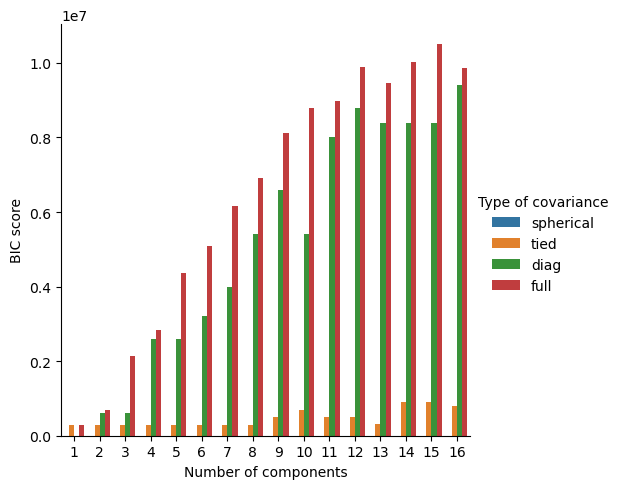

In [75]:
import seaborn as sns
sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

#### Training and Prediction with full data set

In [76]:
gm = GaussianMixture(n_components=Desired_comps, covariance_type='spherical', 
                     random_state=rng_seed).fit(Pure_data_2)
gm.means_

array([[4.24869964e-11, 1.00000000e+00, 1.00000000e+00, 4.24869964e-11,
        8.00000000e-01, 3.00000000e-01, 4.50000000e-01, 4.24869965e-11,
        1.00000000e+00, 1.00000000e+00, 1.76440113e-24, 6.36917543e-20,
        2.00000000e+00, 1.00000000e+00, 1.50000000e-01, 3.00000000e-01],
       [8.63673125e-01, 1.33251570e-11, 1.59055120e-01, 8.63673125e-01,
        4.54564891e-02, 1.59055008e-01, 5.22712085e-01, 9.54540496e-01,
        9.99996931e-01, 9.99996931e-01, 2.26921097e-02, 2.27280760e-02,
        3.68180491e+00, 8.18216559e-01, 1.81825957e-01, 6.81847115e-01],
       [4.34785694e-02, 1.10774883e-10, 8.26086690e-01, 1.30435063e-01,
        3.77639148e-11, 7.82608766e-01, 7.39130519e-01, 8.26087013e-01,
        8.26087013e-01, 3.04348051e-01, 1.73912987e-01, 6.95652272e-01,
        6.45240333e-07, 7.82608766e-01, 4.34782468e-02, 3.04348050e-01],
       [2.85676046e-01, 8.30420072e-28, 9.28580988e-01, 2.48666006e-11,
        4.28514069e-01, 3.57228717e-01, 5.00050515e-01, 1.433

In [77]:
gm.predict(Pure_data_2)

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 3, 3, 0, 1, 2, 2, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 1, 1, 0, 2, 3, 3, 0, 3, 0,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 3, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 3, 2, 0,
       3, 1, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0])

In [78]:
score = metrics.accuracy_score(Target,gm.predict(Pure_data_2))
score

0.37623762376237624

In [79]:
scores = np.vstack((scores, [score, 'GM_F']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F']], dtype='<U32')

#### Training and Prediction with 80/20 split

In [80]:
gm = GaussianMixture(n_components=Desired_comps, covariance_type=Desired_cov, 
                     random_state=rng_seed).fit(Pure_data_2.iloc[:80,:])
gm.means_

array([[5.91645979e-09, 9.99999994e-01, 9.99999994e-01, 5.91645979e-09,
        7.50000001e-01, 3.12499998e-01, 4.99999997e-01, 5.91645980e-09,
        1.00000000e+00, 1.00000000e+00, 1.66296068e-21, 2.86904363e-17,
        2.00000000e+00, 1.00000000e+00, 1.87499999e-01, 2.49999999e-01],
       [9.18181883e-01, 8.99679095e-15, 1.09641843e-01, 9.18181883e-01,
        2.78237231e-02, 1.65288230e-01, 5.82644116e-01, 9.72176245e-01,
        9.99999971e-01, 9.99999971e-01, 2.62778057e-02, 2.78226606e-02,
        3.77741233e+00, 8.06886489e-01, 2.22589806e-01, 7.51239531e-01],
       [5.88256489e-02, 1.63911489e-12, 7.64704160e-01, 1.76472443e-01,
        2.14407672e-11, 8.82353206e-01, 8.23529809e-01, 8.82353206e-01,
        8.82353206e-01, 2.35295840e-01, 1.76470191e-01, 7.64706412e-01,
        4.50389807e-06, 8.23529809e-01, 5.88233969e-02, 2.94119237e-01],
       [2.71262164e-01, 4.21677070e-27, 9.09579279e-01, 9.52123774e-11,
        4.52103607e-01, 3.67054951e-01, 5.47896393e-01, 5.372

In [81]:
gm.predict(Pure_data_2.iloc[80:,:])

array([2, 2, 2, 0, 1, 3, 2, 0, 3, 1, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0])

In [82]:
score = metrics.accuracy_score(Target.iloc[80:],gm.predict(Pure_data_2.iloc[80:,:]))
score

0.23809523809523808

In [83]:
scores = np.vstack((scores, [score, 'GM_80']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80']], dtype='<U32')

### BayesianGaussianMixture

#### Training and Prediction with full data set

In [84]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=Desired_comps, covariance_type=Desired_cov, 
                              random_state=rng_seed).fit(Pure_data_2)
bgm.means_

array([[2.02734559e-02, 9.61810467e-01, 9.80198020e-01, 1.93305045e-02,
        7.73220179e-01, 3.02687412e-01, 4.54974069e-01, 2.87600189e-02,
        9.91513437e-01, 9.90099010e-01, 3.77180575e-03, 8.01508722e-03,
        2.04007544e+00, 9.87741631e-01, 1.48986327e-01, 3.06459217e-01],
       [8.53911792e-01, 4.40047322e-03, 1.68530622e-01, 8.53471745e-01,
        4.97253474e-02, 1.63470045e-01, 5.23429579e-01, 9.46753912e-01,
        9.96039209e-01, 9.95379138e-01, 2.39762113e-02, 2.59627559e-02,
        3.66314385e+00, 8.16507765e-01, 1.80639426e-01, 6.76352694e-01],
       [5.94060043e-02, 8.25082454e-03, 8.16006545e-01, 1.41914250e-01,
        9.90098943e-03, 7.64851501e-01, 7.31435662e-01, 8.16831696e-01,
        8.25907603e-01, 3.24670013e-01, 1.69966985e-01, 6.73679890e-01,
        1.18399467e-01, 7.80940609e-01, 4.70296998e-02, 3.09818529e-01],
       [2.95042864e-01, 1.32010230e-02, 9.05612686e-01, 2.70620972e-02,
        4.15832225e-01, 3.57110170e-01, 5.03639049e-01, 4.028

In [85]:
bgm.predict(Pure_data_2)

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 3, 3, 0, 1, 2, 2, 0, 0,
       1, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 1, 1, 0, 2, 3, 3, 0, 3, 0,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 3, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 3, 2, 0,
       3, 1, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0])

In [86]:
score = metrics.accuracy_score(Target,bgm.predict(Pure_data_2))
score

0.37623762376237624

In [87]:
scores = np.vstack((scores, [score, 'BGM_F']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80'],
       ['0.37623762376237624', 'BGM_F']], dtype='<U32')

#### Training and Prediction with 80/20 split

In [88]:
bgm = BayesianGaussianMixture(n_components=Desired_comps, covariance_type=Desired_cov, 
                     random_state=rng_seed).fit(Pure_data_2.iloc[:80,:])
bgm.means_

array([[2.72058826e-02, 9.52941176e-01, 9.72794117e-01, 2.64705885e-02,
        7.19117647e-01, 3.16176470e-01, 5.06617647e-01, 3.67647062e-02,
        9.90441176e-01, 9.87500000e-01, 4.41176470e-03, 1.02941176e-02,
        2.05588235e+00, 9.85294118e-01, 1.86029412e-01, 2.62500000e-01],
       [9.04728915e-01, 5.40742939e-03, 1.22308232e-01, 9.04390950e-01,
        3.31205049e-02, 1.71987375e-01, 5.83965901e-01, 9.62823922e-01,
        9.95606463e-01, 9.94254605e-01, 2.87130931e-02, 3.17670328e-02,
        3.75531705e+00, 8.04353485e-01, 2.20690712e-01, 7.42506033e-01],
       [8.12530486e-02, 1.11110742e-02, 7.52080838e-01, 1.91669349e-01,
        1.24999585e-02, 8.54167151e-01, 8.11806180e-01, 8.68055993e-01,
        8.79861510e-01, 2.65974658e-01, 1.70832766e-01, 7.31945334e-01,
        1.63894982e-01, 8.19445044e-01, 6.45831190e-02, 3.03474533e-01],
       [2.88210483e-01, 1.66475369e-02, 8.78264886e-01, 3.74569580e-02,
        4.34916902e-01, 3.65312655e-01, 5.51556975e-01, 5.317

In [89]:
bgm.predict(Pure_data_2.iloc[80:,:])

array([2, 2, 2, 0, 1, 3, 2, 0, 3, 1, 1, 1, 2, 1, 1, 0, 1, 3, 1, 2, 0])

In [90]:
score = metrics.accuracy_score(Target.iloc[80:],bgm.predict(Pure_data_2.iloc[80:,:]))
score

0.23809523809523808

In [91]:
scores = np.vstack((scores, [score, 'BGM_80']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80'],
       ['0.37623762376237624', 'BGM_F'],
       ['0.23809523809523808', 'BGM_80']], dtype='<U32')

## Random Forest

#### Training and Prediction with full data set

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=None
                             ,random_state=rng_seed
                            )
clf.fit(Pure_data_2, Target)
clf.predict(Pure_data_2)

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [93]:
score = metrics.accuracy_score(Target,clf.predict(Pure_data_2))
score

1.0

In [94]:
scores = np.vstack((scores, [score, 'RF_F']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80'],
       ['0.37623762376237624', 'BGM_F'],
       ['0.23809523809523808', 'BGM_80'],
       ['1.0', 'RF_F']], dtype='<U32')

#### Training and Prediction with 80/20 split

In [95]:
clf = RandomForestClassifier(max_depth=None
                             ,random_state=rng_seed
                            )
clf.fit(Pure_data_2.iloc[:80,:], Target.iloc[:80])
clf.predict(Pure_data_2.iloc[80:,:])

array([3, 6, 4, 2, 1, 7, 4, 2, 6, 5, 2, 5, 4, 1, 1, 2, 1, 6, 1, 6, 2])

In [96]:
score = metrics.accuracy_score(Target.iloc[80:],clf.predict(Pure_data_2.iloc[80:,:]))
score

0.8095238095238095

In [97]:
scores = np.vstack((scores, [score, 'RF_80']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80'],
       ['0.37623762376237624', 'BGM_F'],
       ['0.23809523809523808', 'BGM_80'],
       ['1.0', 'RF_F'],
       ['0.8095238095238095', 'RF_80']], dtype='<U32')

#### Training and Prediction with 60/40 split

In [98]:
clf = RandomForestClassifier(max_depth=None
                             ,random_state=rng_seed
                            )
clf.fit(Pure_data_2.iloc[:60,:], Target.iloc[:60])
clf.predict(Pure_data_2.iloc[60:,:])

array([4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 6, 4, 1, 1, 4, 7, 2, 2, 5, 6,
       4, 2, 1, 7, 4, 2, 6, 5, 2, 5, 4, 1, 1, 2, 1, 6, 1, 6, 2])

In [99]:
score = metrics.accuracy_score(Target.iloc[60:],clf.predict(Pure_data_2.iloc[60:,:]))
score

0.8048780487804879

In [100]:
scores = np.vstack((scores, [score, 'RF_60']))
scores

array([['0.3465346534653465', 'K_F'],
       ['0.0', 'K_80'],
       ['0.37623762376237624', 'GM_F'],
       ['0.23809523809523808', 'GM_80'],
       ['0.37623762376237624', 'BGM_F'],
       ['0.23809523809523808', 'BGM_80'],
       ['1.0', 'RF_F'],
       ['0.8095238095238095', 'RF_80'],
       ['0.8048780487804879', 'RF_60']], dtype='<U32')

### Tree Visualisation

## Please do a pip install graphviz in your python terminal environment.

In [101]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

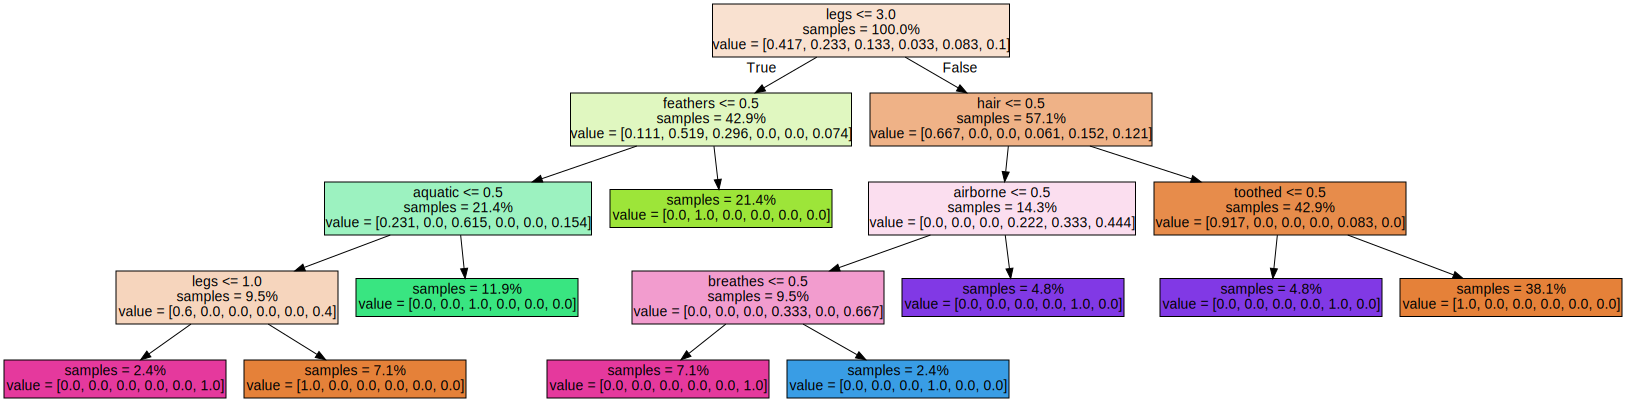

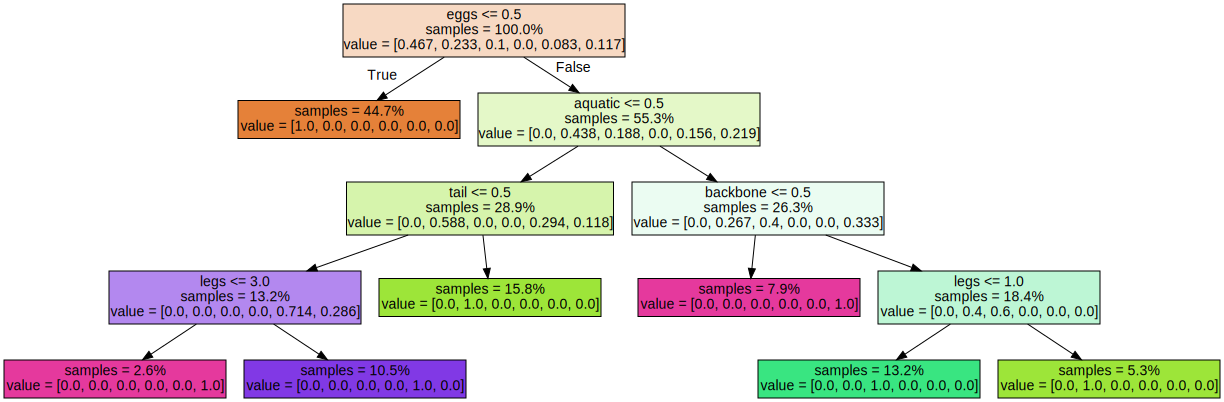

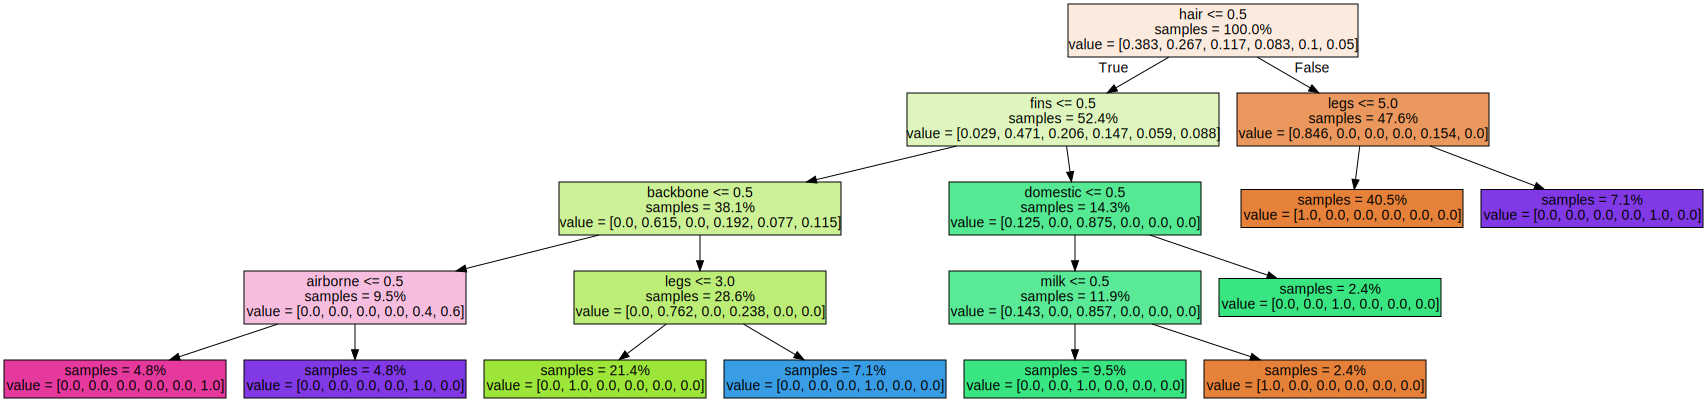

In [102]:
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Pure_data_2.columns,  
                               filled=True,  
                               max_depth=16, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [103]:
df = pd.DataFrame(scores)
df

,0,1
0,0.3465346534653465,K_F
1,0.0,K_80
2,0.37623762376237624,GM_F
3,0.23809523809523808,GM_80
4,0.37623762376237624,BGM_F
5,0.23809523809523808,BGM_80
6,1.0,RF_F
7,0.8095238095238095,RF_80
8,0.8048780487804879,RF_60


In [104]:
df = df.sort_values(by=[0])
df

,0,1
1,0.0,K_80
3,0.23809523809523808,GM_80
5,0.23809523809523808,BGM_80
0,0.3465346534653465,K_F
2,0.37623762376237624,GM_F
4,0.37623762376237624,BGM_F
8,0.8048780487804879,RF_60
7,0.8095238095238095,RF_80
6,1.0,RF_F


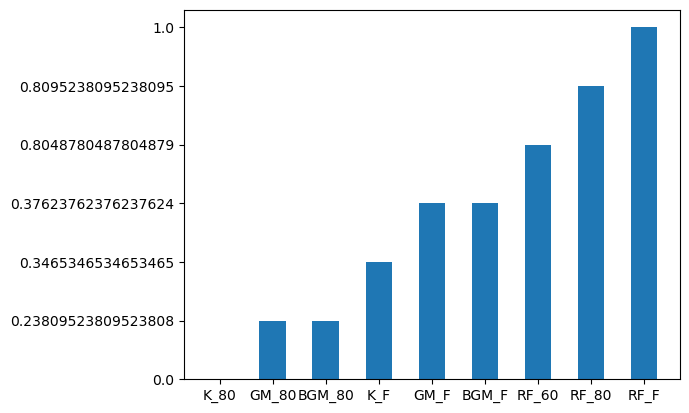

In [105]:
plt.bar(df.loc[:,1], df.loc[:,0], width=0.5)

plt.show()